In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


In [21]:
data=pd.read_csv(r'/content/house_prices.csv')
data.head(10)

,area,bedrooms,bathrooms,stories,parking,price
0,1500,3,2,1,1,300000
1,1800,4,3,2,2,400000
2,2400,3,2,1,1,500000
3,3000,5,4,2,2,600000
4,3500,4,3,2,2,700000
5,4000,5,4,3,3,800000
6,1300,2,1,1,0,250000
7,1700,3,2,1,1,350000
8,2200,3,2,2,1,450000
9,2800,4,3,2,2,550000


In [22]:
data=data.dropna()
data

,area,bedrooms,bathrooms,stories,parking,price
0,1500,3,2,1,1,300000
1,1800,4,3,2,2,400000
2,2400,3,2,1,1,500000
3,3000,5,4,2,2,600000
4,3500,4,3,2,2,700000
5,4000,5,4,3,3,800000
6,1300,2,1,1,0,250000
7,1700,3,2,1,1,350000
8,2200,3,2,2,1,450000
9,2800,4,3,2,2,550000


In [23]:
x=data.iloc[:, :-1]
y=data.iloc[:,-1]

In [24]:
x

,area,bedrooms,bathrooms,stories,parking
0,1500,3,2,1,1
1,1800,4,3,2,2
2,2400,3,2,1,1
3,3000,5,4,2,2
4,3500,4,3,2,2
5,4000,5,4,3,3
6,1300,2,1,1,0
7,1700,3,2,1,1
8,2200,3,2,2,1
9,2800,4,3,2,2


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test_scaled)
y_pred

array([420220.58823529, 344852.94117647])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 42463.235294117534
Mean Squared Error: 1964005730.9688673
Root Mean Squared Error: 44317.104271024604
R-squared Score: -2.142409169550188


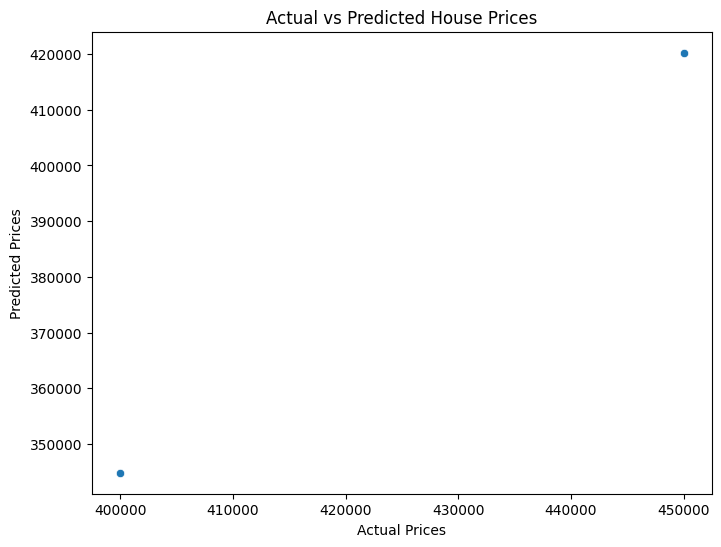

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [32]:
import pickle

# Save the trained model to a file
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")



Model saved successfully!
